<a href="https://colab.research.google.com/github/DivyaDeepthi123/PyTorch-Testing/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset,DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
df=pd.read_csv("/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


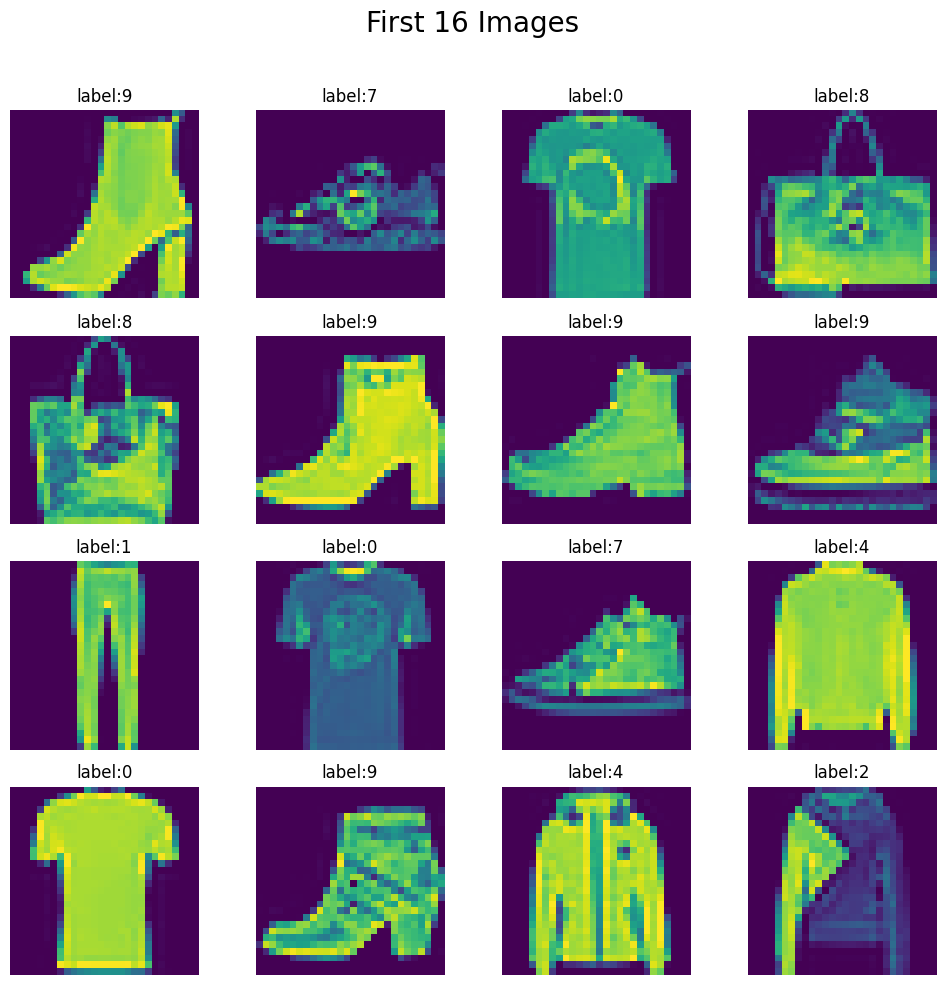

In [ ]:
fig,axes=plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 Images",fontsize=20)
for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"label:{df.iloc[i,0]}")#shows the label
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values
y

array([9, 7, 0, ..., 8, 4, 8])

In [ ]:
x=x/255.0

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [ ]:
train_dataset=CustomDataset(x_train,y_train)
test_dataset=CustomDataset(x_test,y_test)

In [ ]:
train_dataloader=DataLoader(train_dataset,shuffle=True,batch_size=32)
test_dataloader=DataLoader(test_dataset,shuffle=False,batch_size=32)

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,features):
    return self.model(features)


In [ ]:
epochs=101
learning_rate=0.01

In [ ]:
model=NeuralNetwork(x_train.shape[1])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
#training loop
for epoch in range(epochs):
  total=0
  for batch_features,batch_labels in train_dataloader:
    y_pred=model.forward(batch_features)
    loss=criterion(y_pred,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total=total+loss.item()
  avg=total/32
  print(f"epoch:{epoch} loss:{avg}")





epoch:0 loss:0.023402566199365538
epoch:1 loss:0.02302149780734908
epoch:2 loss:0.023068694932590006
epoch:3 loss:0.022690327739837812
epoch:4 loss:0.022377270688593853
epoch:5 loss:0.02239190607360797
epoch:6 loss:0.02255166399118025
epoch:7 loss:0.022370582639268832
epoch:8 loss:0.022343742684824974
epoch:9 loss:0.02208936045644805
epoch:10 loss:0.021841125100763747
epoch:11 loss:0.021319269108062144
epoch:12 loss:0.02165163394238334
epoch:13 loss:0.021387291732025915
epoch:14 loss:0.021254570045130095
epoch:15 loss:0.02126652614970226
epoch:16 loss:0.02096578969121765
epoch:17 loss:0.020686865693278378
epoch:18 loss:0.02060148719101562
epoch:19 loss:0.020424675742106047
epoch:20 loss:0.020541552185022738
epoch:21 loss:0.020218168869178044
epoch:22 loss:0.020330908890173305
epoch:23 loss:0.02026146247590077
epoch:24 loss:0.01998608940084523
epoch:25 loss:0.02003305514153908
epoch:26 loss:0.019657004762848374
epoch:27 loss:0.019501642706018174
epoch:28 loss:0.019279316384199774
epoch:

In [ ]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#model evaluation
total=0
correct=0
with torch.no_grad():
  for batch_features,batch_labels in test_dataloader:
    outputs=model(batch_features)
    _, predicted=torch.max(outputs,1)
    correct+=(predicted==batch_labels).sum().item()
    total+=batch_labels.shape[0]
  acc=correct/total
  print(f"accuracy:{acc}")



accuracy:0.8208333333333333
